<a href="https://colab.research.google.com/github/AnalistaF1/AnalisesF1/blob/main/F1_RBRING_2019_VER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.1 MB/s eta 0:00:00


In [55]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
calendario = fastf1.get_event_schedule(2019)

In [10]:
print(calendario)

    RoundNumber        Country           Location  \
0             1      Australia          Melbourne   
1             2        Bahrain             Sakhir   
2             3          China           Shanghai   
3             4     Azerbaijan               Baku   
4             5          Spain          Barcelona   
5             6         Monaco        Monte Carlo   
6             7         Canada           Montréal   
7             8         France       Le Castellet   
8             9        Austria          Spielberg   
9            10  Great Britain        Silverstone   
10           11        Germany         Hockenheim   
11           12        Hungary           Budapest   
12           13        Belgium  Spa-Francorchamps   
13           14          Italy              Monza   
14           15      Singapore          Singapore   
15           16         Russia              Sochi   
16           17          Japan             Suzuka   
17           18         Mexico        Mexico C

In [11]:
calendario.columns

Index(['RoundNumber', 'Country', 'Location', 'OfficialEventName', 'EventDate',
       'EventName', 'EventFormat', 'Session1', 'Session1Date',
       'Session1DateUtc', 'Session2', 'Session2Date', 'Session2DateUtc',
       'Session3', 'Session3Date', 'Session3DateUtc', 'Session4',
       'Session4Date', 'Session4DateUtc', 'Session5', 'Session5Date',
       'Session5DateUtc', 'F1ApiSupport'],
      dtype='object')

In [16]:
calendario = calendario.loc[:,['RoundNumber','Country']]

In [17]:
calendario

,RoundNumber,Country
0,1,Australia
1,2,Bahrain
2,3,China
3,4,Azerbaijan
4,5,Spain
5,6,Monaco
6,7,Canada
7,8,France
8,9,Austria
9,10,Great Britain


In [27]:
session = fastf1.get_session(2019,9,'R')
session.load()

results = session.results

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Austrian Grand Prix - Race [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status

In [28]:
results = session.results

In [29]:
results.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')

In [30]:
results = results.loc[:,['Abbreviation','TeamName','TeamId','GridPosition','Position']]


In [32]:
results

,Abbreviation,TeamName,TeamId,GridPosition,Position
33,VER,Red Bull Racing,red_bull,2.0,1.0
16,LEC,Ferrari,ferrari,1.0,2.0
77,BOT,Mercedes,mercedes,3.0,3.0
5,VET,Ferrari,ferrari,9.0,4.0
44,HAM,Mercedes,mercedes,4.0,5.0
4,NOR,McLaren,mclaren,5.0,6.0
10,GAS,Red Bull Racing,red_bull,8.0,7.0
55,SAI,McLaren,mclaren,19.0,8.0
7,RAI,Alfa Romeo Racing,alfa,6.0,9.0
99,GIO,Alfa Romeo Racing,alfa,7.0,10.0


In [38]:
laps = session.laps

In [46]:
VERlaps = laps.pick_drivers('VER')

/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [47]:
VERlaps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [51]:
VERlaps = VERlaps.loc[:,['Driver','LapTime','LapNumber','Stint','IsPersonalBest','Compound','TyreLife','TrackStatus','Position','Deleted']]

In [52]:
VERlaps

,Driver,LapTime,LapNumber,Stint,IsPersonalBest,Compound,TyreLife,TrackStatus,Position,Deleted
0,VER,0 days 00:01:16.629000,1.0,1.0,False,MEDIUM,4.0,1,7.0,False
1,VER,0 days 00:01:11.495000,2.0,1.0,True,MEDIUM,5.0,1,7.0,False
2,VER,0 days 00:01:10.999000,3.0,1.0,True,MEDIUM,6.0,1,7.0,False
3,VER,0 days 00:01:11.100000,4.0,1.0,False,MEDIUM,7.0,1,7.0,False
4,VER,0 days 00:01:10.839000,5.0,1.0,True,MEDIUM,8.0,1,7.0,False
...,...,...,...,...,...,...,...,...,...,...
66,VER,0 days 00:01:08.981000,67.0,2.0,False,HARD,36.0,1,2.0,False
67,VER,0 days 00:01:09.276000,68.0,2.0,False,HARD,37.0,1,2.0,False
68,VER,0 days 00:01:08.176000,69.0,2.0,False,HARD,38.0,1,1.0,False
69,VER,0 days 00:01:07.944000,70.0,2.0,False,HARD,39.0,1,1.0,False


In [56]:
VERlaps['LapTimeSeconds'] = VERlaps['LapTime'].dt.total_seconds()

In [61]:
import seaborn as sns

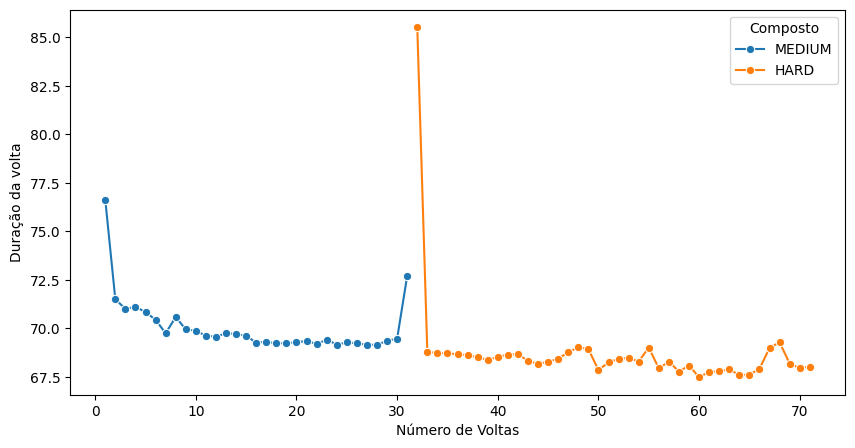

In [66]:
plt.figure(figsize=(10,5))
sns.lineplot(data=VERlaps, x='LapNumber', y='LapTimeSeconds', hue = 'Compound', marker = 'o')
plt.xlabel('Número de Voltas')
plt.ylabel('Duração da volta')
plt.legend(title = 'Composto')
plt.show()

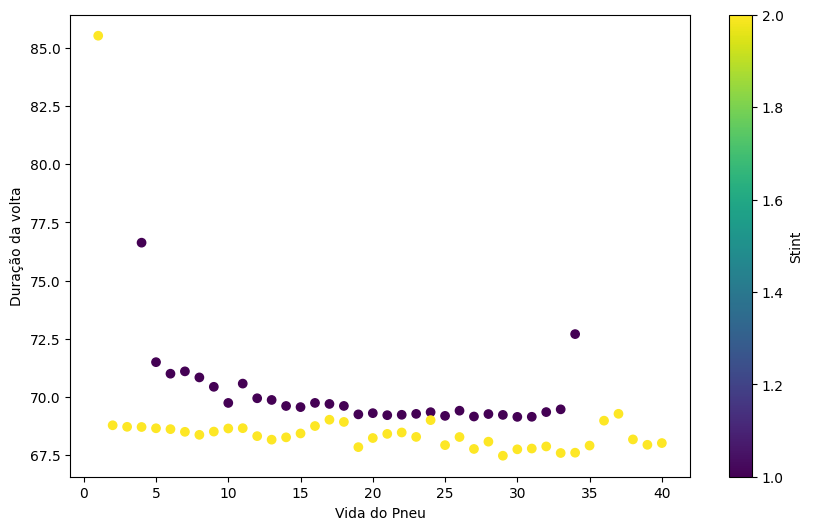

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(VERlaps['TyreLife'],VERlaps['LapTimeSeconds'], c=VERlaps['Stint'])
plt.colorbar(label='Stint')
plt.xlabel('Vida do Pneu')
plt.ylabel('Duração da volta')
plt.show()

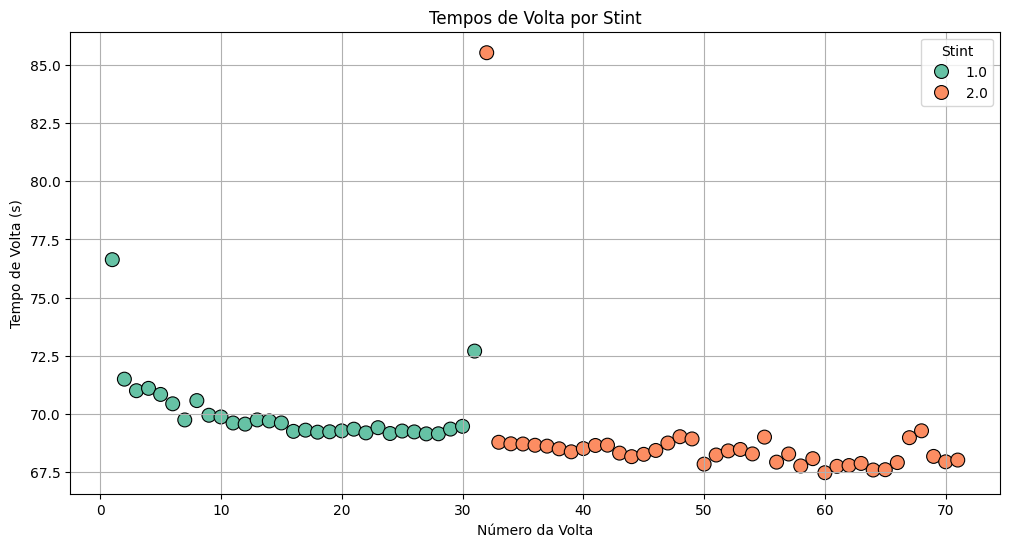

In [75]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=VERlaps, x='LapNumber', y='LapTimeSeconds',
    hue='Stint', palette='Set2', s=100, edgecolor='k'
)
plt.xlabel('Número da Volta')
plt.ylabel('Tempo de Volta (s)')
plt.title('Tempos de Volta por Stint')
plt.legend(title='Stint')
plt.grid(True)
plt.show()


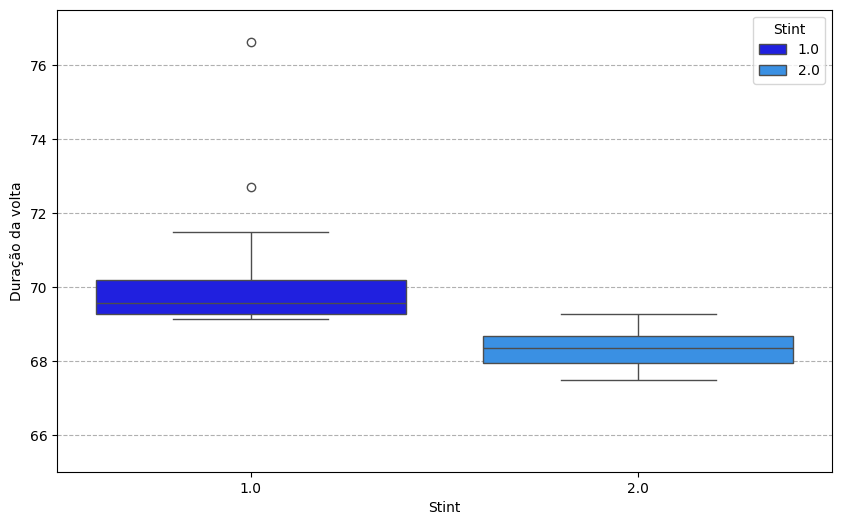

In [138]:
plt.figure(figsize=(10,6))
sns.boxplot(data=VERlaps, x='Stint', y='LapTimeSeconds',hue = 'Stint', palette=['Blue','DodgerBlue'])
plt.xlabel('Stint')
plt.ylabel('Duração da volta')
plt.grid(axis='y', linestyle='--')
plt.ylim(65,77.5)
plt.show()

In [96]:
VERlaps.loc[:,'LapTimeSeconds'].describe()

,LapTimeSeconds
count,71.000000
mean,69.321437
std,2.363195
min,67.475000
25%,68.281000
50%,68.981000
75%,69.439000
max,85.521000


In [100]:
GROlaps = laps.pick_drivers('GRO')
GROlaps = GROlaps.loc[:,['Driver','LapTime','LapNumber','Stint','IsPersonalBest','Compound','TyreLife','TrackStatus','Position','Deleted']]
GROlaps['LapTimeSeconds'] = GROlaps['LapTime'].dt.total_seconds()

In [121]:
laps['LapTimeSecond'] = laps['LapTime'].dt.total_seconds()

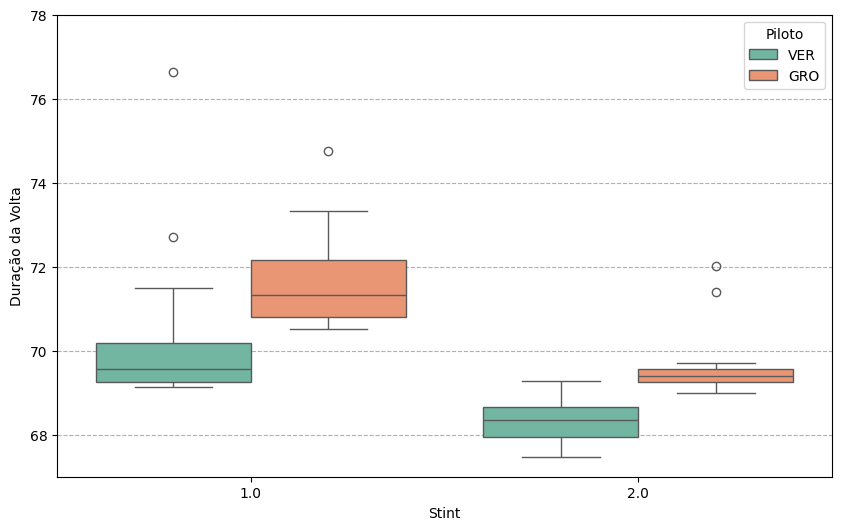

In [122]:
plt.figure(figsize=(10,6))
sns.boxplot(data=laps[laps['Driver'].isin(['GRO','VER'])]
            , x='Stint', y='LapTimeSecond', hue = 'Driver', palette='Set2')
plt.grid(axis='y', linestyle='--')
plt.xlabel('Stint')
plt.ylabel('Duração da Volta')
plt.legend(title='Piloto')
plt.ylim(67,78)
plt.show()

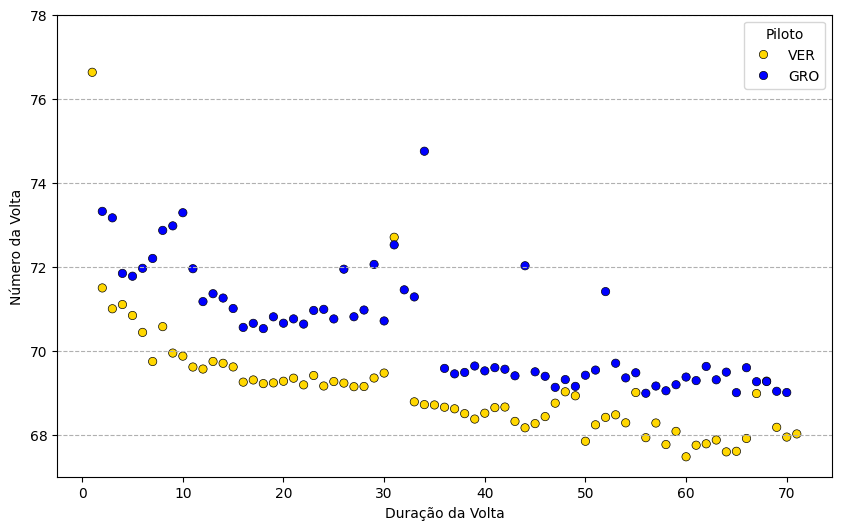

In [134]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=laps[laps['Driver'].isin(['GRO','VER'])], x = 'LapNumber', y = 'LapTimeSecond'
                          , hue = 'Driver', palette=['Gold','Blue'], edgecolor='k')
plt.grid(axis='y', linestyle='--')
plt.xlabel('Duração da Volta')
plt.ylabel('Número da Volta')
plt.legend(title='Piloto')
plt.ylim(67,78)

plt.show()

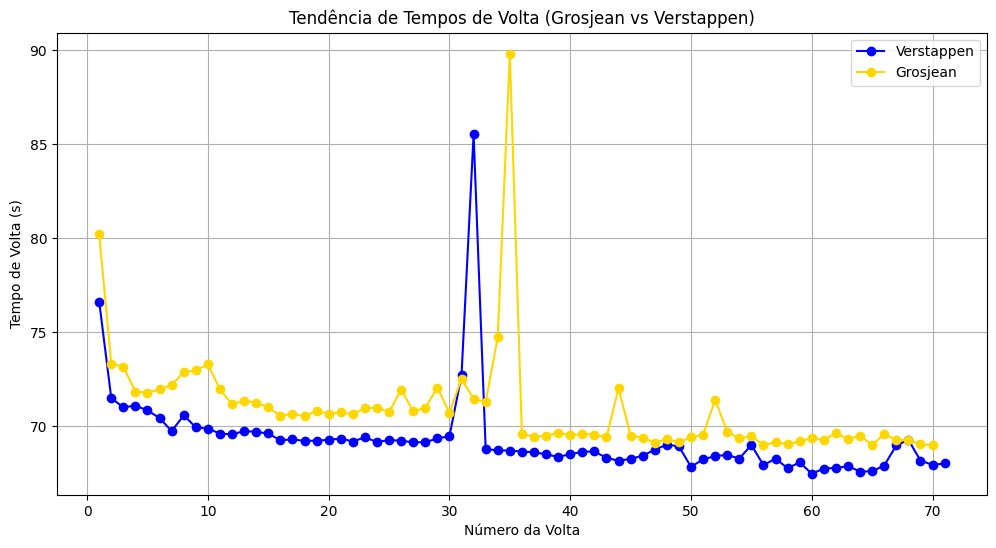

In [132]:
plt.figure(figsize=(12, 6))

# Plotar os tempos de Verstappen
plt.plot(VERlaps['LapNumber'], VERlaps['LapTimeSeconds'],
         label='Verstappen', color='blue', marker='o')

# Plotar os tempos de Grosjean
plt.plot(GROlaps['LapNumber'], GROlaps['LapTimeSeconds'],
         label='Grosjean', color='gold', marker='o')

plt.xlabel('Número da Volta')
plt.ylabel('Tempo de Volta (s)')
plt.title('Tendência de Tempos de Volta (Grosjean vs Verstappen)')
plt.legend()
plt.grid(True)
plt.show()